### Кейела Патачона, Нпммд-02-17  ДЗ № 7

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
V = 10
K = 2
N = np.array([5,10,20,50,100])
b = np.array([1,2])
lambdaa = np.array([2,1])
mu = np.array([1,1])

In [3]:
# Реккурентная формула
def dq(v,N):
    eps = lambdaa / N
    rho = eps / mu
    if v < 0:
        return 0
    elif v == 0:
        return 1
    else:
        result = 0
        for k in range(K):
            result += (N+1 - v / b[k]) * b[k] * rho[k] * dq(v-b[k],N)
        return result / v

In [4]:
# Пример макровероятности
dq(4,5)

1.488

In [5]:
# Вероятности
def qv(N):
    q = []
    G = 0
    for v in range(V+1):
        tmp_dq = dq(v,N)
        q.append(tmp_dq)
        G += tmp_dq
    return np.array(q) / G

In [6]:
qv(5)

array([9.53674316e-02, 1.90734863e-01, 2.47955322e-01, 2.13623047e-01,
       1.41906738e-01, 7.11669922e-02, 2.83813477e-02, 8.54492188e-03,
       1.98364258e-03, 3.05175781e-04, 3.05175781e-05])

In [7]:
sum(qv(5))

1.0000000000000002

In [8]:
# Для каждого значения N
for Ni in N:
    print(f"N = {Ni}: ",'')
    print(qv(Ni))

N = 5:  
[9.53674316e-02 1.90734863e-01 2.47955322e-01 2.13623047e-01
 1.41906738e-01 7.11669922e-02 2.83813477e-02 8.54492188e-03
 1.98364258e-03 3.05175781e-04 3.05175781e-05]
N = 10:  
[0.07258566 0.14517131 0.20323984 0.20033641 0.16157567 0.10689254
 0.06090227 0.0298658  0.01289783 0.00488719 0.00164548]
N = 20:  
[0.06130531 0.12261063 0.17778541 0.18636816 0.16365454 0.12132567
 0.07942778 0.04621697 0.02438866 0.01172493 0.00519193]
N = 50:  
[0.05470127 0.10940255 0.16191577 0.17583178 0.16197966 0.12783125
 0.09018287 0.0573716  0.03352787 0.01811533 0.00914004]
N = 100:  
[0.05254252 0.10508504 0.1565767  0.17200319 0.16092702 0.12956523
 0.09359848 0.06123105 0.03693385 0.02068158 0.01085535]


Если $N=\infty$, то 

$$\displaystyle{q'(v) = \lim_{N \to \infty}\frac{1}{v}\sum_{k=1}^{K}\left(N+1-\frac{v}{b_k}\right)b_k\widetilde{\rho_k}q'(v-b_k) \quad v=1-V}$$

$$\displaystyle{q'(v) = \lim_{N \to \infty}\frac{1}{v}\sum_{k=1}^{K}\left(N+1-\frac{v}{b_k}\right)b_k\frac{\lambda_k}{N\mu_k}q'(v-b_k) \quad v=1-V}$$

$$\displaystyle{q'(v) = \frac{1}{v}\sum_{k=1}^{K} b_k\frac{\lambda_k}{\mu_k} q'(v-b_k) \quad v=1-V}$$ 

То есть получаем модель эрланга

In [9]:
# N = infinity (N = 1e15)
qv(1e15)

array([0.05040981, 0.10081963, 0.15122944, 0.16803271, 0.15963107,
       0.13106551, 0.09689886, 0.06513268, 0.04050789, 0.02347568,
       0.01279671])

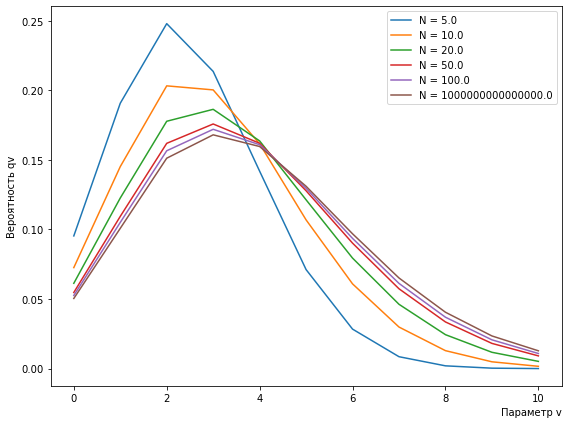

In [10]:
# Строим график чтобы наглядно посмотреть 
N = np.append(N,1e15)
qv_N = []
plt.figure(figsize=(8,6))
for Ni in N:
    q = qv(Ni)
    qv_N.append(q)
    plt.plot(np.arange(len(q)),q,label=f"N = {Ni}")

plt.xlabel("Параметр v",loc='right')
plt.ylabel("Вероятность qv")
plt.legend()
plt.tight_layout()

plt.savefig("qv.png")
plt.show()

In [11]:
#UTIL для каждого N
for i in range(len(N)):
    q = qv_N[i]
    UTIL = 0
    for v in range(V+1):
        UTIL += v*q[v]
    print(f"N = {N[i]} UTIL = {UTIL}")

N = 5.0 UTIL = 2.5000000000000004
N = 10.0 UTIL = 3.0715220087285586
N = 20.0 UTIL = 3.4511708975941335
N = 50.0 UTIL = 3.7131641034891945
N = 100.0 UTIL = 3.8061489337274095
N = 1000000000000000.0 UTIL = 3.9018617846496237


In [12]:
# Вероятность блокировки пи_1  и  пи_2 по каждому N
for i in range(len(N)):
    q = qv_N[i]
    pi = [0]*K
    for k in range(K):
        for v in range(V-b[k]+1, V+1):
            pi[k] += q[v]
    print(f"N = {N[i]}: blocking_prob: ",end='')
    print(pi)

N = 5.0: blocking_prob: [3.0517578125000014e-05, 0.0003356933593750001]
N = 10.0: blocking_prob: [0.0016454836048616478, 0.006532670012146443]
N = 20.0: blocking_prob: [0.00519192846197736, 0.016916861759915074]
N = 50.0: blocking_prob: [0.009140042360899433, 0.027255375478699315]
N = 100.0: blocking_prob: [0.010855346662443213, 0.03153692551570465]
N = 1000000000000000.0: blocking_prob: [0.012796713315747483, 0.03627239435943481]


## Придуманная задача

> В маленком городе, находится агенство предоставляющее $K=13$ услуг. У этого агенства фактически $200$ постоянных клиентов и $V=8$ сотрудников. Обычно каждый клиент приходит для получения одной услуги $k$ с интенсивностью $\varepsilon_k$. Выполнение $k-$ой услуги требует совместное обслужвание $b_k$ сотрудников на $T_k$ единиц времени и сотрудник обязен сосредоточиться только на обслуживаемого клиента.

> Для $v = 0-V$ найти вероятность, того что занято $v$ сотрудников, UTIL, и вероятность блокировки запроса услуги $k$, $k=1-K$.

In [13]:
import secrets, random

In [14]:
# Параметры
V = 8
K = 13
N = 200
# b = np.array([1,2])
# lambdaa = np.array([2,1])
# mu = np.array([1,1])

In [15]:
b = np.array([0]*K)
eps = np.array([0.]*K)
mu = np.array([0.]*K) # Можно было разигрывать время,и потом посчитать mu

for k in range(K):
    b[k] = secrets.randbelow(3)+1
    eps[k] = 0.1 + (1.0 - 0.1)*random.random()
    mu[k] = 5.0 + (8.0 - 5.0)*random.random()

In [16]:
eps

array([0.17257452, 0.74215235, 0.77534188, 0.24058132, 0.88537384,
       0.66129257, 0.95179621, 0.23918887, 0.31665192, 0.75838256,
       0.80442155, 0.9975423 , 0.50582705])

In [17]:
mu

array([7.69107629, 7.93393313, 5.99941725, 7.63732777, 5.39315782,
       5.92269907, 7.77226661, 5.47801506, 5.20762084, 6.74860171,
       7.1304618 , 6.36022965, 5.48337261])

In [18]:
# Реккурентная формула
rho = eps / mu
def new_dq(v):
    if v < 0:
        return 0
    elif v == 0:
        return 1
    else:
        result = 0
        for k in range(K):
            result += (N+1 - v / b[k]) * b[k] * rho[k] * new_dq(v-b[k])
        return result / v

In [19]:
print(f"dq(-1) = {new_dq(-1)} \ndq(0) = {new_dq(0)} \ndq(1) = {new_dq(1)}")

dq(-1) = 0 
dq(0) = 1 
dq(1) = 80.41132636741173


In [20]:
# Вероятности
q = []
G = 0
for v in range(V+1):
    tmp_dq = new_dq(v)
    q.append(tmp_dq)
    G += tmp_dq
q = np.array(q) / G

In [21]:
q

array([9.73511155e-12, 7.82813232e-10, 3.25171819e-08, 9.27547660e-07,
       2.03899678e-05, 3.67701294e-04, 5.65648846e-03, 7.62352877e-02,
       9.17719172e-01])

In [22]:
sum(q)

1.0

In [23]:
UTIL = 0
for v in range(V+1):
    UTIL += v*q[v]
print(f"UTIL = {UTIL}")

UTIL = 7.911262233225131


In [24]:
pi = [0]*K
for k in range(K):
    for v in range(V-b[k]+1, V+1):
        pi[k] += q[v]
    print(f"pi[{k+1}] = {pi[k]}")

pi[1] = 0.917719171722787
pi[2] = 0.917719171722787
pi[3] = 0.917719171722787
pi[4] = 0.9939544594165731
pi[5] = 0.9939544594165731
pi[6] = 0.9939544594165731
pi[7] = 0.9996109478803925
pi[8] = 0.9939544594165731
pi[9] = 0.9939544594165731
pi[10] = 0.9996109478803925
pi[11] = 0.9939544594165731
pi[12] = 0.917719171722787
pi[13] = 0.9939544594165731
